# Notebook- Model K1_2 - Tensors   
# Author : V.Albors   Date : 22.01.2020
# Purpose : Train with tensors and regularization & Batch size =128



**Input** :  
  * CSV files that identify the images to use as train and validation. CSV files are in directory csv_dir   
  * Images from train and validation. Images are in directory : imag_dir  
  * Saved model. Model is in directory : model_bin_dir  
  
**Output**:  
  * JMODEL dir - Json network model
  * BMODEL dir - Optimum model with weights
  * RESULTS dir - Print of Network architecture 
                - Train and Validation Accuracy and Loss Curves
                - Metrics of the Model 

**Process**:  
 * Read Train and Validation images ( identified in the .csv files ) from the imag_dir directory   
 * Create a train and validation input & label tensors (no augmentation)
 * Define the architecture of model : Same as Model K1_1 with batch size = 128 ) 
                        
 * Train the model with the train dataset with callbacks (  ModuleCheckPoint , Early Stopping)
 * Save the trained model and history of the model in directory model_bin_dir 
 * Paint the Accuracy and Loss curves
 * Create results : Metrics 
 

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf

tf.keras.backend.clear_session()  # Reset

In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
tf.config.experimental.list_physical_devices('GPU') 
physical_devices = tf.config.experimental.list_physical_devices('GPU')
assert len(physical_devices) > 0, "Not enough GPU hardware devices available"
tf.config.experimental.set_memory_growth(physical_devices[0], True)
tf.debugging.set_log_device_placement(True)

Num GPUs Available:  1


In [3]:
# Define the name of the model 
Model_directory = "MODELK1"
Model_name = "ModelK1_2"
TRAIN = True

In [4]:
# Import routines
import sys  
subrc_dir = "/home/valborsf/Documents/UOC/PFMProject/"

sys.path.append(subrc_dir)  
from  Models_routines import *
import inspect

# List functions inside the module
import Models_routines as module
functions = inspect.getmembers(module, inspect.isfunction)
lsfunctions = [item[0] for item in functions]
print ( lsfunctions )

['confusion_ROC_AUC', 'create_column_tensor', 'create_label_tensor', 'create_val_test', 'define_dirs', 'extract_images_bm', 'extract_images_train', 'load_hist_model', 'load_images', 'load_images_tf', 'model_load', 'plot_save_acc_loss', 'print_network', 'process_clinical_info', 'read_dataframes', 'read_dataframes_tables', 'reproducible_results', 'save_model', 'save_network_json', 'start', 'stop', 'to_one_hot', 'to_one_hot_words', 'xi_squared']


In [5]:
# Reproducible results 
reproducible_results ()

In [6]:
# Define directories
(root_dir,json_dir,imag_dir,csv_dir,model_json_dir,model_bin_dir,results_dir,Tensor_dir) = define_dirs(Model_directory)

In [7]:
# New dataset without SONIC disturbing images
json_dir =  root_dir +"/DataNew/ALL_JSON/"                # .json dir images
imag_dir =  root_dir +"/DataNew/ALL_IMAGES/"              # .png dir - images

# directories for  CSV's
csv_dir =  root_dir +"/DataNew4/CSV/"                      # .csv dir - dftrain, dfval, dftest

In [8]:
# Load train,validation & Test 
(dftrain, dfval, dftest) = read_dataframes(csv_dir)

/home/valborsf/Documents/UOC/PFMProject/DataNew4/CSV/


In [9]:
# Define the label tensor
train_label_tensor = create_label_tensor(dftrain)
val_label_tensor = create_label_tensor(dfval)
#test_label_tensor = create_label_tensor(dftest)

In [10]:
# Create tensors from images
# Load Images 
height_imag = 150 
width_imag = 150
# This step is very time consuming !!!!!!!
train_image_tensor  = load_images_tf(dftrain,height_imag,width_imag)
val_image_tensor  = load_images_tf(dfval,height_imag,width_imag)
#test_image_tensor  = load_images(dftest,height_imag,width_imag)

Executing op ReadFile in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op DecodeJpeg in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Cast in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ExpandDims in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ResizeBilinear in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Squeeze in device /job:localhost/replica:0/task:0/device:CPU:0
(2100, 150, 150, 3)
(700, 150, 150, 3)


In [11]:
#import keras
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras import Input
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import ModelCheckpoint

# Model 1 : Image to Predict Melanoma

image_inputs = Input(shape=(height_imag,width_imag,3))
m2 = layers.Conv2D(64, (3,3), kernel_regularizer=regularizers.l2(0.01), activation='relu')(image_inputs)
m2 = layers.MaxPooling2D((2,2))(m2)
m2 = layers.Conv2D(32, (3,3), kernel_regularizer=regularizers.l2(0.01), activation='relu')(m2)
m2 = layers.MaxPooling2D((2,2))(m2)
m2 = layers.Conv2D(128, (3,3),kernel_regularizer=regularizers.l2(0.01), activation='relu')(m2)
m2 = layers.MaxPooling2D((2,2))(m2)
m2 = layers.Flatten()(m2)
m2 = layers.Dense (512, activation='relu')(m2)
m2 = layers.Dropout(0.23)(m2)
benign_malign = layers.Dense (1, activation='sigmoid')(m2)


# Model instantiation
model = Model(image_inputs, benign_malign)



Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/tas

In [12]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       36992     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0     

In [13]:
#Print Network 
print_network (results_dir, model, Model_name)
#Save Network 
save_network_json (model_json_dir, model, Model_name)

In [14]:
# Model Compile
from tensorflow.keras import optimizers

model.compile ( loss='binary_crossentropy',
#               optimizer = optimizers.RMSprop(lr=1e-4),
               optimizer = optimizers.Adam(lr=1e-4),
               metrics= ['acc'])

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0


In [15]:
# Callbacks
callbacks_list = [
# EarlyStopping when the model does not improve in loss

         tf.keras.callbacks.EarlyStopping (
             monitor = 'val_loss',             # Monitors the accuracy
             verbose=1,                        # log when finishes
             patience = 4,),                   # Interrupt if acc no improve in 4 epochs

#  ModelCheckpoint to store the weights of the best performing epoch. 
    
         tf.keras.callbacks.ModelCheckpoint(filepath=model_bin_dir+"Best_weights"+Model_name+".hdf5", 
             monitor = 'val_loss', # Won't overwritte the model file unless val_loss has
             verbose=1,            # improve 
             save_best_only=True),
         
#         keras.callbacks.TensorBoard(
#             log_dir =  Tensor_dir, 
#            histogram_freq = 1,
#            )
                ]

In [16]:
# Model fit
epochs= 200
batch_size = 128
import time
start_time = time.time()
history = model.fit (train_image_tensor, 
           train_label_tensor, 
           epochs = epochs, 
           batch_size = batch_size, 
           callbacks=callbacks_list,
           validation_data =( val_image_tensor,val_label_tensor))

elapsed_time = time.time() - start_time

print( time.strftime('Time spent in training :'"%H:%M:%S", time.gmtime(elapsed_time)))

save_model(model, history, model_bin_dir, Model_name)

Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Te

Epoch 11/200
2048/2100 [============================>.] - ETA: 0s - loss: 1.1344 - acc: 0.7148
Epoch 00011: val_loss improved from 1.15526 to 1.14888, saving model to /home/valborsf/Documents/UOC/PFMProject/MODELK1/BMODEL/Best_weightsModelK1_2.hdf5
2100/2100 [==============================] - 2s 1ms/sample - loss: 1.1345 - acc: 0.7148 - val_loss: 1.1489 - val_acc: 0.6600
Epoch 12/200
2048/2100 [============================>.] - ETA: 0s - loss: 1.1155 - acc: 0.7036
Epoch 00012: val_loss improved from 1.14888 to 1.10930, saving model to /home/valborsf/Documents/UOC/PFMProject/MODELK1/BMODEL/Best_weightsModelK1_2.hdf5
2100/2100 [==============================] - 2s 1ms/sample - loss: 1.1148 - acc: 0.7043 - val_loss: 1.1093 - val_acc: 0.6829
Epoch 13/200
2048/2100 [============================>.] - ETA: 0s - loss: 1.0959 - acc: 0.7104
Epoch 00013: val_loss improved from 1.10930 to 1.06238, saving model to /home/valborsf/Documents/UOC/PFMProject/MODELK1/BMODEL/Best_weightsModelK1_2.hdf5
210

2100/2100 [==============================] - 3s 1ms/sample - loss: 0.6776 - acc: 0.7852 - val_loss: 0.7207 - val_acc: 0.7586
Epoch 61/200
2048/2100 [============================>.] - ETA: 0s - loss: 0.6768 - acc: 0.7783
Epoch 00061: val_loss improved from 0.72072 to 0.71864, saving model to /home/valborsf/Documents/UOC/PFMProject/MODELK1/BMODEL/Best_weightsModelK1_2.hdf5
2100/2100 [==============================] - 3s 1ms/sample - loss: 0.6742 - acc: 0.7814 - val_loss: 0.7186 - val_acc: 0.7700
Epoch 62/200
2048/2100 [============================>.] - ETA: 0s - loss: 0.6645 - acc: 0.7808
Epoch 00062: val_loss did not improve from 0.71864
2100/2100 [==============================] - 2s 1ms/sample - loss: 0.6669 - acc: 0.7790 - val_loss: 0.7404 - val_acc: 0.7329
Epoch 63/200
2048/2100 [============================>.] - ETA: 0s - loss: 0.6846 - acc: 0.7778
Epoch 00063: val_loss did not improve from 0.71864
2100/2100 [==============================] - 2s 1ms/sample - loss: 0.6856 - acc: 0.7

In [17]:
# Import Model Test if not need to Train 
if not TRAIN :
    model = model_load ( model_bin_dir, Model_name)

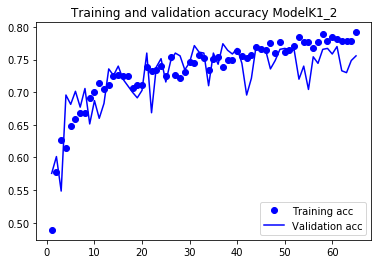

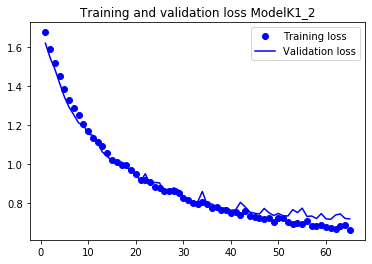

In [18]:
# Display curves of loss and accuracy during training and save results 
plot_save_acc_loss(results_dir, history.history, Model_name)

In [19]:
# Load Model 
# Load weights 

#model = build_model()
#model.load_weights('my_weights.model')
TRAIN = False
if not TRAIN :
    Model_name = "ModelK1_2"
    model = model_load ( model_bin_dir, Model_name)
    model.load_weights(model_bin_dir+"Best_weights"+Model_name+".hdf5")

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Reshape in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/r

In [20]:
# Create tensors from images
# Load Images 

# This step is very time consuming !!!!!!!
test_image_tensor  = load_images_tf(dftest,height_imag,width_imag)

(700, 150, 150, 3)


In [21]:
# Define the label tensor
test_label_tensor = create_label_tensor(dftest)

In [22]:
#  ROC /AUC
scores = model.evaluate(test_image_tensor, test_label_tensor, verbose=2)

Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_distributed_function_49379 in device /job:localhost/replica:0/task:0/device:GPU:0
700/1 - 1s - loss: 0.7186 - acc: 0.7514


In [23]:
model.metrics_names
scores

[0.7205190447398594, 0.75142854]

In [ ]:
# Loss 0.72  Acc=0.75

In [24]:
# Compute predictions
# This takes time !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
y_pred_keras = model.predict(test_image_tensor).ravel()   # y_pred_probabilities
y_pred = y_pred_keras > 0.5                                # y_pred_class : if >0.5  = True => Malignant
y_test = dftest.bm.astype('category').cat.codes            # Ground truth 
class_labels= dftest.bm.unique()                           # Labels of ground truth 


Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_distributed_function_49549 in device /job:localhost/replica:0/task:0/device:GPU:0


Metrics ModelK1_2
Confusion Matrix:
[[230 110]
 [ 64 296]]
+----------------------------+-------------+
|            Type            |  # samples  |
+============================+=============+
| True Positives- Malignants | 296         |
+----------------------------+-------------+
| True Negatives- Benign     | 230         |
+----------------------------+-------------+
| False Positive             | 110         |
+----------------------------+-------------+
| False Negative             | 64          |
+----------------------------+-------------+
Summary classification Report: 
              precision    recall  f1-score   support

   malignant       0.78      0.68      0.73       340
      benign       0.73      0.82      0.77       360

    accuracy                           0.75       700
   macro avg       0.76      0.75      0.75       700
weighted avg       0.75      0.75      0.75       700

+-------------+---------+
|   Metrics   |         |
+=============+=========+
| Accurac

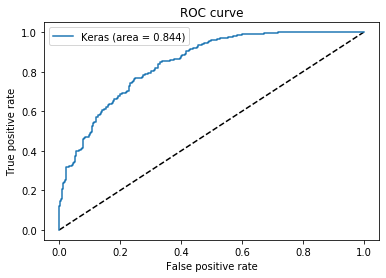

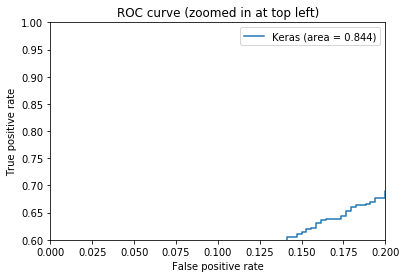

In [25]:
#Print Metrics + Confusion ROC AUC
confusion_ROC_AUC ( y_test, y_pred, y_pred_keras, class_labels, results_dir, Model_name )

In [ ]:
tf.keras.backend.clear_session()  # Reset